In [1]:
import zipfile
import os

with zipfile.ZipFile("playground-series-s4e10.zip", 'r') as zip_ref:
    zip_ref.extractall("loan_data")


In [2]:
# !pip install -U scikit-learn==1.7.0

In [3]:
pip show scikit-learn

Name: scikit-learn
Version: 1.7.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:18: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [6]:
os.listdir("loan_data")

import pandas as pd


df_train = pd.read_csv("loan_data/train.csv")
df_test  = pd.read_csv("loan_data/test.csv")

In [7]:
# df_origi.columns

In [8]:
# df_origi.shape

In [9]:
df_train.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [10]:
df_train.shape

(58645, 13)

In [11]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [12]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [13]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [14]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [15]:
df_train.shape,df_test.shape

((58645, 12), (39098, 11))

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [17]:
df_train.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [18]:
df_test.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [19]:
df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean(), inplace=True)

/tmp/ipython-input-19-1278148906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean(), inplace=True)
/tmp/ipython-input-19-1278148906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [20]:
df_train.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


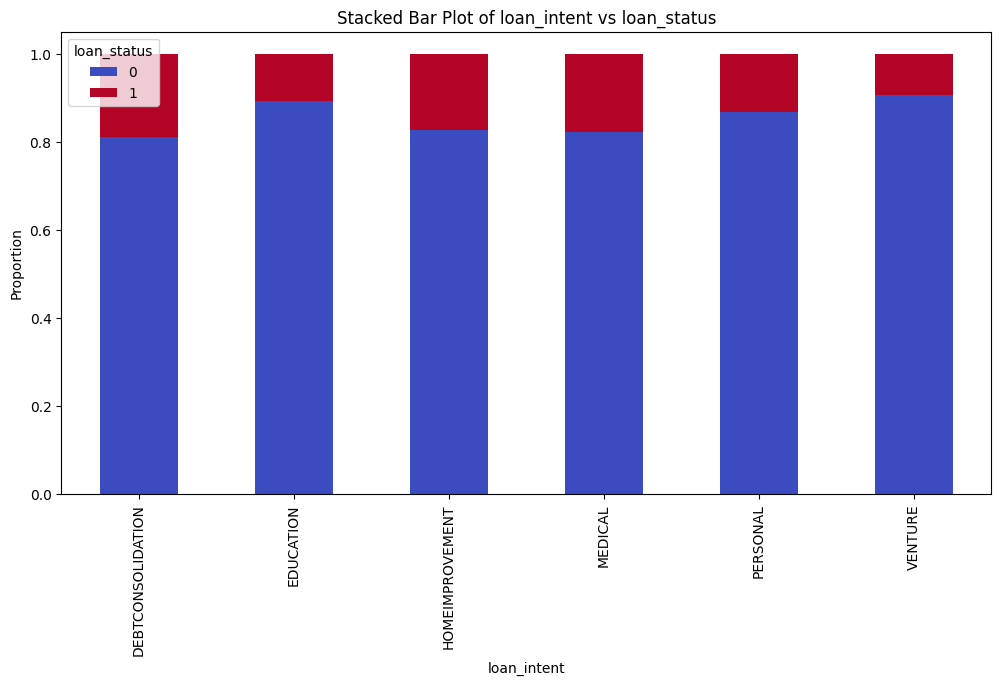

In [21]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(df_train, 'loan_intent')

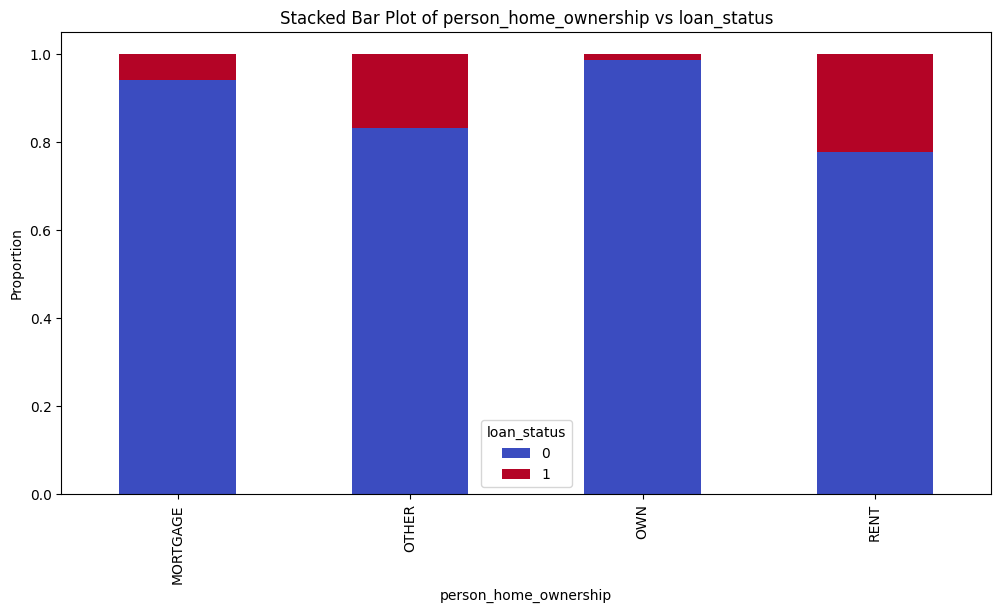

In [22]:
stacked_bar_plot(df_train, 'person_home_ownership')

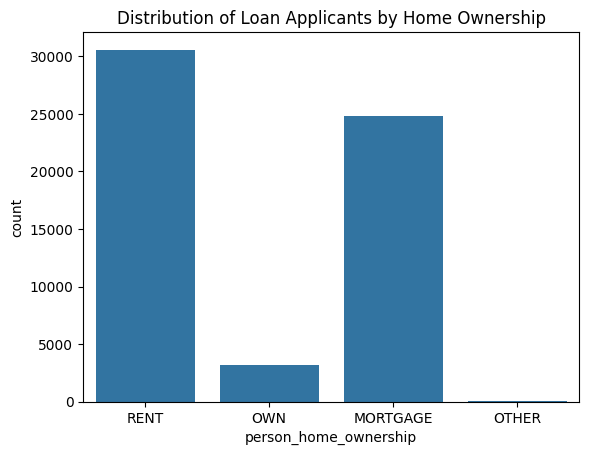

In [23]:
sns.countplot(data=df_train, x='person_home_ownership')
plt.title('Distribution of Loan Applicants by Home Ownership')
plt.show()


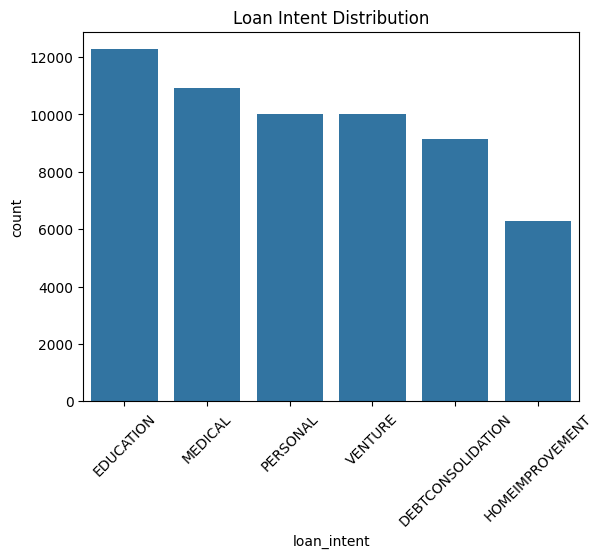

In [24]:
sns.countplot(data=df_train, x='loan_intent')
plt.title('Loan Intent Distribution')
plt.xticks(rotation=45)
plt.show()


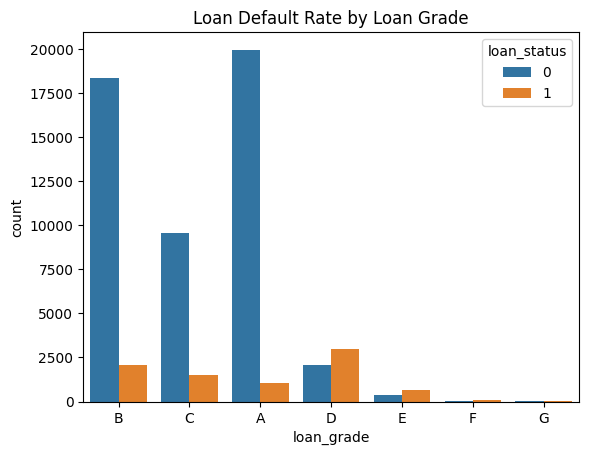

In [25]:
sns.countplot(data=df_train, x='loan_grade', hue='loan_status')
plt.title('Loan Default Rate by Loan Grade')
plt.show()


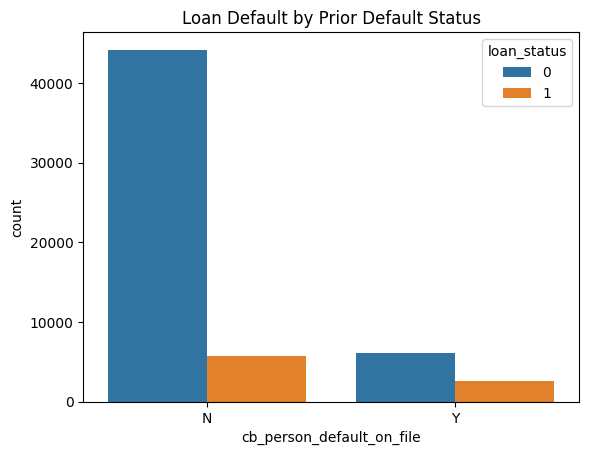

In [26]:
sns.countplot(data=df_train, x='cb_person_default_on_file', hue='loan_status')
plt.title('Loan Default by Prior Default Status')
plt.show()


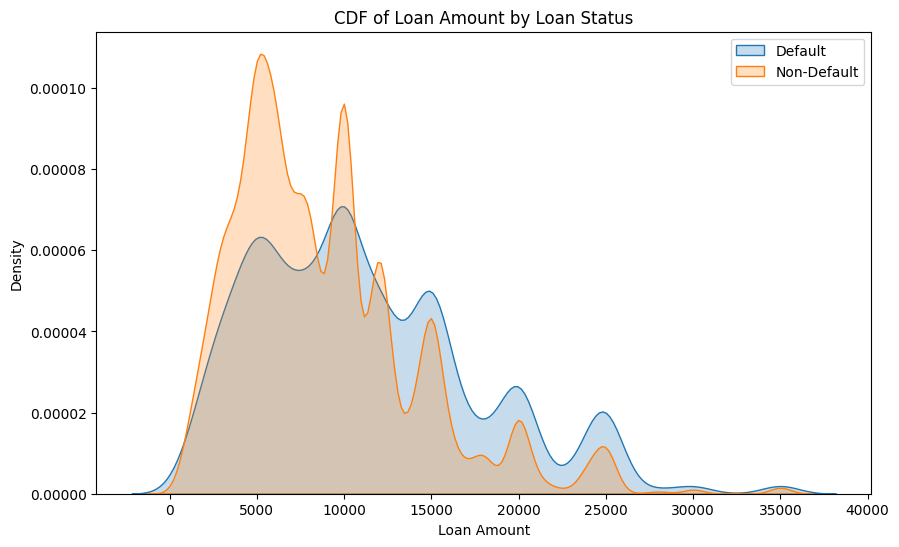

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], label='Default', fill=True)
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], label='Non-Default', fill=True)
plt.title('CDF of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

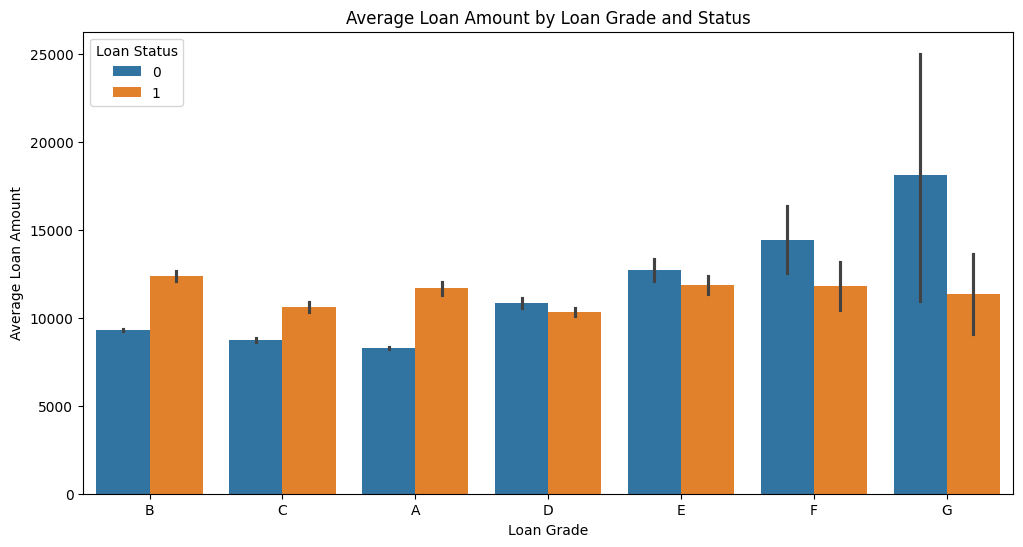

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df_train, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()


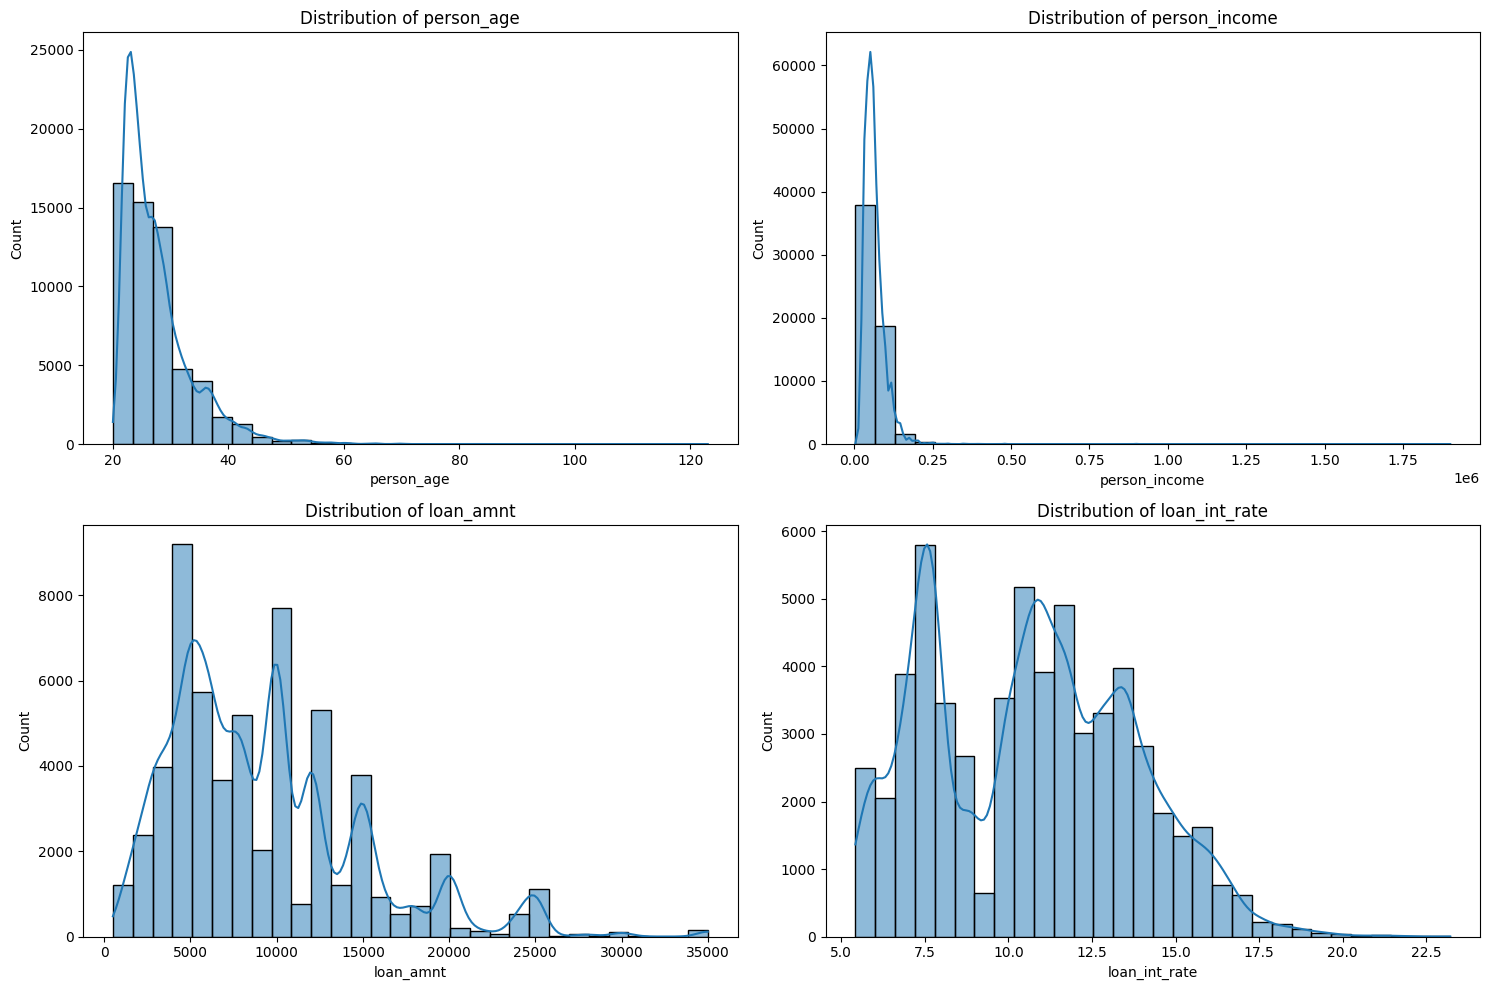

In [29]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [30]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):
    label_enc = LabelEncoder()
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True)
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns
    df_test = df_test.reindex(columns=train_columns, fill_value=0)
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

In [31]:
df_train = df_train_processed
df_test = df_test_processed

In [32]:
df_train.shape,df_test.shape

((58645, 16), (39098, 15))

In [33]:
df_train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [34]:
df_test.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0
cb_person_cred_hist_length,0


In [35]:
def feature_engineering(df):
    eps = 1e-6  # To avoid division by zero

    df['loan_to_income_ratio'] = df['loan_amnt'] / (df['person_income'] + eps)
    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate']
    df['income_per_year_emp'] = df['person_income'] / (df['person_emp_length'] + eps)
    df['cred_hist_to_age_ratio'] = df['cb_person_cred_hist_length'] / (df['person_age'] + eps)
    df['int_to_loan_ratio'] = df['loan_int_rate'] / (df['loan_amnt'] + eps)
    df['loan_int_emp_interaction'] = df['loan_int_rate'] * df['person_emp_length']
    df['debt_to_credit_ratio'] = df['loan_amnt'] / (df['cb_person_cred_hist_length'] + eps)
    df['int_to_cred_hist'] = df['loan_int_rate'] / (df['cb_person_cred_hist_length'] + eps)
    df['int_per_year_emp'] = df['loan_int_rate'] / (df['person_emp_length'] + eps)
    df['loan_amt_per_emp_year'] = df['loan_amnt'] / (df['person_emp_length'] + eps)
    df['income_to_loan_ratio'] = df['person_income'] / (df['loan_amnt'] + eps)

    return df

df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [36]:
y = df_train['loan_status']
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train


In [37]:
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [39]:
class_counts = y.value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
class_counts

,count
loan_status,
0,50295
1,8350


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve
import numpy as np

def find_optimal_threshold(y_true, y_pred, target_ratio=None, alpha=0.5):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

    if target_ratio is None:
        return thresholds[np.argmax(f1_scores[:-1])]
    else:
        target_pos_ratio = 1 / (target_ratio + 1)
        actual_ratios = np.array([(y_pred >= t).mean() for t in thresholds])
        ratio_penalty = np.abs(actual_ratios - target_pos_ratio)
        combined_score = (1-alpha)*f1_scores[:len(thresholds)] - alpha*ratio_penalty
        return thresholds[np.argmax(combined_score)]

# Decision Tree parameters
dt_params = {
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'random_state': 42,
    'class_weight': 'balanced'
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
dt_predictions = np.zeros(len(scaled_train_data))
dt_true_labels = np.zeros(len(scaled_train_data))
dt_test_predictions = np.zeros(len(scaled_test_data))
optimal_thresholds_dt = []

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    print(f"\n=== Decision Tree Fold {fold+1}/{n_splits} ===")

    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    dt_model = DecisionTreeClassifier(**dt_params)
    dt_model.fit(X_train, y_train)

    dt_fold_preds = dt_model.predict_proba(X_val)[:, 1]

    fold_threshold = find_optimal_threshold(y_val, dt_fold_preds,
                                          target_ratio=imbalance_ratio,
                                          alpha=0.3)
    optimal_thresholds_dt.append(fold_threshold)
    print(f"Fold {fold+1} optimal threshold: {fold_threshold:.4f}")

    dt_predictions[val_idx] = dt_fold_preds
    dt_true_labels[val_idx] = y_val
    dt_test_predictions += dt_model.predict_proba(scaled_test_data)[:, 1] / n_splits

# Final threshold (median of fold thresholds)
final_threshold_dt = np.median(optimal_thresholds_dt)
print(f"\nFinal Decision Tree threshold: {final_threshold_dt:.4f}")

print("\n=== Decision Tree Metrics ===")
print(f"Overall AUC: {roc_auc_score(dt_true_labels, dt_predictions):.4f}")

print("\nClassification Report at Optimal Threshold:")
print(classification_report(dt_true_labels, dt_predictions > final_threshold_dt))

print("\nPrediction Statistics:")
print(f"Min probability: {dt_predictions.min():.4f}")
print(f"Mean probability: {dt_predictions.mean():.4f}")
print(f"Median probability: {np.median(dt_predictions):.4f}")
print(f"Max probability: {dt_predictions.max():.4f}")
print(f"%% predictions > 0.5: {(dt_predictions > 0.5).mean()*100:.1f}%")
print(f"%% predictions > final threshold: {(dt_predictions > final_threshold_dt).mean()*100:.1f}%")


=== Decision Tree Fold 1/5 ===
Fold 1 optimal threshold: 0.8188

=== Decision Tree Fold 2/5 ===
Fold 2 optimal threshold: 0.8828

=== Decision Tree Fold 3/5 ===
Fold 3 optimal threshold: 0.8576

=== Decision Tree Fold 4/5 ===
Fold 4 optimal threshold: 0.8633

=== Decision Tree Fold 5/5 ===
Fold 5 optimal threshold: 0.8121

Final Decision Tree threshold: 0.8576

=== Decision Tree Metrics ===
Overall AUC: 0.9102

Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     50295
         1.0       0.90      0.71      0.80      8350

    accuracy                           0.95     58645
   macro avg       0.93      0.85      0.88     58645
weighted avg       0.95      0.95      0.95     58645


Prediction Statistics:
Min probability: 0.0000
Mean probability: 0.2586
Median probability: 0.1260
Max probability: 1.0000
%% predictions > 0.5: 16.5%
%% predictions > final threshold: 11.4%


In [42]:
dt_true_labels
count1=0
idx=0
adjusted_threshold = 0.80
arr1=[]
for i in dt_predictions:
  if i>=adjusted_threshold:
    arr1.append(idx)
    count1+=1
  idx+=1

In [ ]:
count1

7041

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve
import numpy as np
print("Class distribution:")
class_counts = y.value_counts()
print(class_counts)
imbalance_ratio = class_counts[0]/class_counts[1]
print(f"\nImbalance ratio: {imbalance_ratio:.1f}:1")

xgb_params = {
    'n_estimators': 2000,
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0.5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': imbalance_ratio,
    'eval_metric': ['aucpr', 'logloss'],
    'objective': 'binary:logistic',
    'early_stopping_rounds': 100,
    'random_state': 42,
    'tree_method': 'hist'
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
xgb_predictions = np.zeros(len(scaled_train_data))
xgb_true_labels = np.zeros(len(scaled_train_data))
xgb_test_predictions = np.zeros(len(scaled_test_data))
optimal_thresholds = []

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    print(f"\n=== Fold {fold+1}/{n_splits} ===")

    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    xgb_model = XGBClassifier(**xgb_params)
    xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)


    xgb_fold_preds = xgb_model.predict_proba(X_val)[:, 1]

    fold_threshold = find_optimal_threshold(y_val, xgb_fold_preds,
                                          target_ratio=imbalance_ratio,
                                          alpha=0.3)
    optimal_thresholds.append(fold_threshold)
    print(f"Fold {fold+1} optimal threshold: {fold_threshold:.4f}")

    xgb_predictions[val_idx] = xgb_fold_preds
    xgb_true_labels[val_idx] = y_val
    xgb_test_predictions += xgb_model.predict_proba(scaled_test_data)[:, 1] / n_splits

final_threshold = np.median(optimal_thresholds)
print(f"\nFinal selected threshold: {final_threshold:.4f}")

overall_auc = roc_auc_score(xgb_true_labels, xgb_predictions)
print("\n=== Final Metrics ===")
print(f"Overall AUC: {overall_auc:.4f}")

print("\nClassification Report at Optimal Threshold:")
print(classification_report(xgb_true_labels, xgb_predictions > final_threshold))

print(f"Min probability: {xgb_predictions.min():.4f}")
print(f"Mean probability: {xgb_predictions.mean():.4f}")
print(f"Median probability: {np.median(xgb_predictions):.4f}")
print(f"Max probability: {xgb_predictions.max():.4f}")
print(f"%% predictions > 0.5: {(xgb_predictions > 0.5).mean()*100:.1f}%")
print(f"%% predictions > final threshold: {(xgb_predictions > final_threshold).mean()*100:.1f}%")

Class distribution:
loan_status
0    50295
1     8350
Name: count, dtype: int64

Imbalance ratio: 6.0:1

=== Fold 1/5 ===
[0]	validation_0-aucpr:0.77812	validation_0-logloss:0.68746
[10]	validation_0-aucpr:0.80528	validation_0-logloss:0.63791
[20]	validation_0-aucpr:0.80689	validation_0-logloss:0.59509
[30]	validation_0-aucpr:0.80633	validation_0-logloss:0.56010
[40]	validation_0-aucpr:0.81195	validation_0-logloss:0.52864
[50]	validation_0-aucpr:0.81307	validation_0-logloss:0.50127
[60]	validation_0-aucpr:0.81332	validation_0-logloss:0.47797
[70]	validation_0-aucpr:0.81375	validation_0-logloss:0.45723
[80]	validation_0-aucpr:0.81399	validation_0-logloss:0.43886
[90]	validation_0-aucpr:0.81492	validation_0-logloss:0.42252
[100]	validation_0-aucpr:0.81525	validation_0-logloss:0.40836
[110]	validation_0-aucpr:0.81493	validation_0-logloss:0.39561
[120]	validation_0-aucpr:0.81498	validation_0-logloss:0.38407
[130]	validation_0-aucpr:0.81553	validation_0-logloss:0.37352
[140]	validation_0-au

In [45]:
final_threshold = 0.7354
xgb_true_labels
idx=0
arr=[]
count=0
for i in xgb_predictions:
  if i>=final_threshold:
    arr.append(idx)
    count+=1
  idx+=1

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve
import numpy as np


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
nn_predictions = np.zeros(len(scaled_train_data))
nn_true_labels = np.zeros(len(scaled_train_data))
nn_test_predictions = np.zeros(len(scaled_test_data))
optimal_thresholds_nn = []

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    print(f"\n=== Neural Network Fold {fold+1}/{n_splits} ===")

    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model_NN = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    class_weight = {0: 1, 1: imbalance_ratio}

    model_NN.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    early_stop = EarlyStopping(
        monitor='val_auc',
        patience=10,
        mode='max',
        restore_best_weights=True
    )

    model_NN.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=128,
        callbacks=[early_stop],
        class_weight=class_weight,
        verbose=0
    )

    nn_fold_preds = model_NN.predict(X_val, verbose=0).reshape(-1)

    fold_threshold = find_optimal_threshold(
        y_val, nn_fold_preds,
        target_ratio=imbalance_ratio,
        alpha=0.3
    )
    optimal_thresholds_nn.append(fold_threshold)
    print(f"Fold {fold+1} optimal threshold: {fold_threshold:.4f}")

    # results
    nn_predictions[val_idx] = nn_fold_preds
    nn_true_labels[val_idx] = y_val
    nn_test_predictions += model_NN.predict(scaled_test_data, verbose=0).reshape(-1) / n_splits

final_threshold_nn = np.median(optimal_thresholds_nn)
print(f"\nFinal Neural Network threshold: {final_threshold_nn:.4f}")

print("\n=== Neural Network Metrics ===")
print(f"Overall AUC: {roc_auc_score(nn_true_labels, nn_predictions):.4f}")

print("\nClassification Report at Optimal Threshold:")
print(classification_report(nn_true_labels, nn_predictions > final_threshold_nn))

print("\nPrediction Statistics:")
print(f"Min probability: {nn_predictions.min():.4f}")
print(f"Mean probability: {nn_predictions.mean():.4f}")
print(f"Median probability: {np.median(nn_predictions):.4f}")
print(f"Max probability: {nn_predictions.max():.4f}")
print(f"%% predictions > 0.5: {(nn_predictions > 0.5).mean()*100:.1f}%")
print(f"%% predictions > final threshold: {(nn_predictions > final_threshold_nn).mean()*100:.1f}%")


=== Neural Network Fold 1/5 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 optimal threshold: 0.4701

=== Neural Network Fold 2/5 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2 optimal threshold: 0.5433

=== Neural Network Fold 3/5 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 optimal threshold: 0.5292

=== Neural Network Fold 4/5 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4 optimal threshold: 0.6022

=== Neural Network Fold 5/5 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5 optimal threshold: 0.5513

Final Neural Network threshold: 0.5433

=== Neural Network Metrics ===
Overall AUC: 0.8180

Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92     50295
         1.0       0.49      0.48      0.48      8350

    accuracy                           0.85     58645
   macro avg       0.70      0.70      0.70     58645
weighted avg       0.85      0.85      0.85     58645


Prediction Statistics:
Min probability: 0.0000
Mean probability: 0.3758
Median probability: 0.3541
Max probability: 1.0000
%% predictions > 0.5: 20.7%
%% predictions > final threshold: 14.0%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve
import numpy as np

print("Class distribution:")
class_counts = y.value_counts()
print(class_counts)
imbalance_ratio = class_counts[0]/class_counts[1]
print(f"\nImbalance ratio: {imbalance_ratio:.1f}:1")

rf_params = {
    'n_estimators': 500,          
    'max_depth': None,            
    'min_samples_split': 2,       
    'min_samples_leaf': 1,        
    'max_features': 'sqrt',       
    'class_weight': 'balanced',  
    'random_state': 42,
    'n_jobs': -1                 
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
rf_predictions = np.zeros(len(scaled_train_data))
rf_true_labels = np.zeros(len(scaled_train_data))
rf_test_predictions = np.zeros(len(scaled_test_data))
optimal_thresholds = []

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    print(f"\n=== Fold {fold+1}/{n_splits} ===")

    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    rf_model = RandomForestClassifier(**rf_params)
    rf_model.fit(X_train, y_train)

    rf_fold_preds = rf_model.predict_proba(X_val)[:, 1]

    fold_threshold = find_optimal_threshold(y_val, rf_fold_preds,
                                          target_ratio=imbalance_ratio,
                                          alpha=0.3)
    optimal_thresholds.append(fold_threshold)
    print(f"Fold {fold+1} optimal threshold: {fold_threshold:.4f}")

    rf_predictions[val_idx] = rf_fold_preds
    rf_true_labels[val_idx] = y_val
    rf_test_predictions += rf_model.predict_proba(scaled_test_data)[:, 1] / n_splits

final_threshold = np.median(optimal_thresholds)
print(f"\nFinal selected threshold: {final_threshold:.4f}")

overall_auc = roc_auc_score(rf_true_labels, rf_predictions)
print("\n=== Final Metrics ===")
print(f"Overall AUC: {overall_auc:.4f}")

print("\nClassification Report at Optimal Threshold:")
print(classification_report(rf_true_labels, rf_predictions > final_threshold))

print(f"Min probability: {rf_predictions.min():.4f}")
print(f"Mean probability: {rf_predictions.mean():.4f}")
print(f"Median probability: {np.median(rf_predictions):.4f}")
print(f"Max probability: {rf_predictions.max():.4f}")
print(f"%% predictions > 0.5: {(rf_predictions > 0.5).mean()*100:.1f}%")
print(f"%% predictions > final threshold: {(rf_predictions > final_threshold).mean()*100:.1f}%")

Class distribution:
loan_status
0    50295
1     8350
Name: count, dtype: int64

Imbalance ratio: 6.0:1

=== Fold 1/5 ===
Fold 1 optimal threshold: 0.3900

=== Fold 2/5 ===
Fold 2 optimal threshold: 0.3140

=== Fold 3/5 ===
Fold 3 optimal threshold: 0.3660

=== Fold 4/5 ===
Fold 4 optimal threshold: 0.3600

=== Fold 5/5 ===
Fold 5 optimal threshold: 0.4300

Final selected threshold: 0.3660

=== Final Metrics ===
Overall AUC: 0.9329

Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     50295
         1.0       0.89      0.72      0.79      8350

    accuracy                           0.95     58645
   macro avg       0.92      0.85      0.88     58645
weighted avg       0.95      0.95      0.94     58645

Min probability: 0.0000
Mean probability: 0.1402
Median probability: 0.0320
Max probability: 1.0000
%% predictions > 0.5: 10.4%
%% predictions > final threshold: 11.5%


In [61]:
rf_true_labels
#Final selected threshold: 0.3660
idx=0
arr3=[]
count3=0
for i in rf_predictions:
  if i>=0.3660:
    arr3.append(idx)
    count3+=1
  idx+=1

In [62]:
count3

6759

In [63]:
nn_true_labels
idx=0
arr2=[]
count2=0
for i in nn_predictions:
  if i>=0.5433:
    arr2.append(idx)
    count2+=1
  idx+=1

In [64]:
count2

8186

In [65]:
scaled_train_data.iloc[arr3]

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,financial_burden,income_per_year_emp,cred_hist_to_age_ratio,int_to_loan_ratio,loan_int_emp_interaction,debt_to_credit_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,income_to_loan_ratio
16,26,80000,3,2.0,3,17000,14.11,0.21,1,3,...,239870.00,3.999998e+04,0.115385,0.000830,28.22,5666.664778,4.703332,7.054996e+00,8.499996e+03,4.705882
24,22,30000,3,3.0,3,5000,16.49,0.17,0,4,...,82450.00,9.999997e+03,0.181818,0.003298,49.47,1249.999688,4.122499,5.496665e+00,1.666666e+03,6.000000
55,29,34560,3,8.0,4,10000,16.40,0.29,1,8,...,164000.00,4.319999e+03,0.275862,0.001640,131.20,1249.999844,2.050000,2.050000e+00,1.250000e+03,3.456000
58,24,40000,3,1.0,1,14125,9.91,0.35,0,3,...,139978.75,3.999996e+04,0.125000,0.000702,9.91,4708.331764,3.303332,9.909990e+00,1.412499e+04,2.831858
62,28,60000,3,5.0,4,17200,17.06,0.28,1,8,...,293432.00,1.200000e+04,0.285714,0.000992,85.30,2149.999731,2.132500,3.411999e+00,3.439999e+03,3.488372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58624,22,36000,3,5.0,4,16000,16.45,0.44,0,4,...,263200.00,7.199999e+03,0.181818,0.001028,82.25,3999.999000,4.112499,3.289999e+00,3.199999e+03,2.250000
58632,23,29654,3,1.0,0,10000,6.54,0.34,0,2,...,65400.00,2.965397e+04,0.086957,0.000654,6.54,4999.997500,3.269998,6.539993e+00,9.999990e+03,2.965400
58638,29,46610,0,1.0,3,2600,17.58,0.05,0,6,...,45708.00,4.660995e+04,0.206897,0.006762,17.58,433.333261,2.930000,1.757998e+01,2.599997e+03,17.926923
58641,28,28800,3,0.0,2,10000,12.73,0.35,0,8,...,127300.00,2.880000e+10,0.285714,0.001273,0.00,1249.999844,1.591250,1.273000e+07,1.000000e+10,2.880000


In [55]:
scaled_train_data.iloc[arr]

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,financial_burden,income_per_year_emp,cred_hist_to_age_ratio,int_to_loan_ratio,loan_int_emp_interaction,debt_to_credit_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,income_to_loan_ratio
8,37,69600,3,11.0,3,5000,14.84,0.07,1,11,...,74200.0,6.327272e+03,0.297297,0.002968,163.24,454.545413,1.349091,1.349091e+00,4.545454e+02,13.920000
16,26,80000,3,2.0,3,17000,14.11,0.21,1,3,...,239870.0,3.999998e+04,0.115385,0.000830,28.22,5666.664778,4.703332,7.054996e+00,8.499996e+03,4.705882
24,22,30000,3,3.0,3,5000,16.49,0.17,0,4,...,82450.0,9.999997e+03,0.181818,0.003298,49.47,1249.999688,4.122499,5.496665e+00,1.666666e+03,6.000000
39,22,32000,3,6.0,3,8000,15.58,0.25,0,3,...,124640.0,5.333332e+03,0.136364,0.001947,93.48,2666.665778,5.193332,2.596666e+00,1.333333e+03,4.000000
55,29,34560,3,8.0,4,10000,16.40,0.29,1,8,...,164000.0,4.319999e+03,0.275862,0.001640,131.20,1249.999844,2.050000,2.050000e+00,1.250000e+03,3.456000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58628,26,54000,3,4.0,3,1600,14.96,0.03,1,3,...,23936.0,1.350000e+04,0.115385,0.009350,59.84,533.333156,4.986665,3.739999e+00,3.999999e+02,33.750000
58632,23,29654,3,1.0,0,10000,6.54,0.34,0,2,...,65400.0,2.965397e+04,0.086957,0.000654,6.54,4999.997500,3.269998,6.539993e+00,9.999990e+03,2.965400
58638,29,46610,0,1.0,3,2600,17.58,0.05,0,6,...,45708.0,4.660995e+04,0.206897,0.006762,17.58,433.333261,2.930000,1.757998e+01,2.599997e+03,17.926923
58641,28,28800,3,0.0,2,10000,12.73,0.35,0,8,...,127300.0,2.880000e+10,0.285714,0.001273,0.00,1249.999844,1.591250,1.273000e+07,1.000000e+10,2.880000


In [49]:
arr

[8,
 16,
 24,
 39,
 55,
 58,
 67,
 68,
 81,
 85,
 87,
 98,
 107,
 114,
 120,
 121,
 124,
 126,
 129,
 137,
 142,
 163,
 194,
 213,
 221,
 224,
 241,
 246,
 276,
 282,
 284,
 299,
 310,
 311,
 320,
 345,
 346,
 347,
 355,
 362,
 394,
 396,
 400,
 417,
 424,
 434,
 437,
 442,
 461,
 471,
 490,
 507,
 508,
 510,
 519,
 525,
 527,
 534,
 540,
 556,
 561,
 566,
 567,
 603,
 609,
 613,
 617,
 633,
 652,
 657,
 680,
 695,
 700,
 704,
 725,
 733,
 735,
 739,
 740,
 741,
 744,
 752,
 753,
 769,
 775,
 792,
 801,
 805,
 822,
 823,
 825,
 849,
 854,
 871,
 877,
 899,
 903,
 909,
 911,
 937,
 960,
 964,
 983,
 991,
 992,
 993,
 1009,
 1017,
 1018,
 1023,
 1033,
 1044,
 1047,
 1056,
 1057,
 1061,
 1071,
 1073,
 1088,
 1089,
 1091,
 1096,
 1125,
 1127,
 1133,
 1136,
 1139,
 1143,
 1146,
 1160,
 1161,
 1185,
 1189,
 1212,
 1224,
 1226,
 1252,
 1267,
 1273,
 1278,
 1285,
 1286,
 1295,
 1304,
 1307,
 1308,
 1310,
 1317,
 1320,
 1322,
 1334,
 1336,
 1343,
 1355,
 1357,
 1377,
 1384,
 1389,
 1399,
 1418,

In [51]:
df_train.shape

(58645, 26)

In [54]:
arr1

[16,
 24,
 39,
 55,
 58,
 67,
 68,
 81,
 85,
 87,
 98,
 107,
 114,
 120,
 121,
 124,
 126,
 129,
 137,
 142,
 163,
 184,
 194,
 213,
 221,
 224,
 241,
 246,
 276,
 282,
 284,
 299,
 310,
 311,
 345,
 346,
 355,
 362,
 394,
 396,
 400,
 410,
 417,
 424,
 434,
 442,
 461,
 467,
 471,
 490,
 507,
 508,
 510,
 519,
 525,
 527,
 534,
 540,
 542,
 549,
 556,
 561,
 566,
 567,
 603,
 609,
 613,
 617,
 633,
 652,
 655,
 657,
 680,
 692,
 695,
 700,
 704,
 716,
 725,
 733,
 735,
 739,
 740,
 741,
 744,
 752,
 753,
 769,
 775,
 801,
 805,
 822,
 823,
 825,
 849,
 854,
 877,
 903,
 911,
 912,
 937,
 960,
 964,
 983,
 991,
 992,
 993,
 1009,
 1017,
 1023,
 1033,
 1044,
 1047,
 1056,
 1057,
 1061,
 1064,
 1071,
 1073,
 1088,
 1089,
 1091,
 1096,
 1125,
 1127,
 1133,
 1136,
 1139,
 1143,
 1146,
 1160,
 1161,
 1185,
 1189,
 1208,
 1212,
 1224,
 1226,
 1252,
 1267,
 1273,
 1278,
 1285,
 1286,
 1295,
 1304,
 1307,
 1308,
 1310,
 1317,
 1320,
 1322,
 1334,
 1336,
 1343,
 1355,
 1357,
 1377,
 1384,
 1389

In [56]:
scaled_train_data.iloc[arr1]

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,financial_burden,income_per_year_emp,cred_hist_to_age_ratio,int_to_loan_ratio,loan_int_emp_interaction,debt_to_credit_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,income_to_loan_ratio
16,26,80000,3,2.0,3,17000,14.11,0.21,1,3,...,239870.00,3.999998e+04,0.115385,0.000830,28.22,5666.664778,4.703332,7.054996e+00,8.499996e+03,4.705882
24,22,30000,3,3.0,3,5000,16.49,0.17,0,4,...,82450.00,9.999997e+03,0.181818,0.003298,49.47,1249.999688,4.122499,5.496665e+00,1.666666e+03,6.000000
39,22,32000,3,6.0,3,8000,15.58,0.25,0,3,...,124640.00,5.333332e+03,0.136364,0.001947,93.48,2666.665778,5.193332,2.596666e+00,1.333333e+03,4.000000
55,29,34560,3,8.0,4,10000,16.40,0.29,1,8,...,164000.00,4.319999e+03,0.275862,0.001640,131.20,1249.999844,2.050000,2.050000e+00,1.250000e+03,3.456000
58,24,40000,3,1.0,1,14125,9.91,0.35,0,3,...,139978.75,3.999996e+04,0.125000,0.000702,9.91,4708.331764,3.303332,9.909990e+00,1.412499e+04,2.831858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58611,21,24000,3,5.0,2,10000,13.85,0.42,0,4,...,138500.00,4.799999e+03,0.190476,0.001385,69.25,2499.999375,3.462499,2.769999e+00,2.000000e+03,2.400000
58624,22,36000,3,5.0,4,16000,16.45,0.44,0,4,...,263200.00,7.199999e+03,0.181818,0.001028,82.25,3999.999000,4.112499,3.289999e+00,3.199999e+03,2.250000
58632,23,29654,3,1.0,0,10000,6.54,0.34,0,2,...,65400.00,2.965397e+04,0.086957,0.000654,6.54,4999.997500,3.269998,6.539993e+00,9.999990e+03,2.965400
58638,29,46610,0,1.0,3,2600,17.58,0.05,0,6,...,45708.00,4.660995e+04,0.206897,0.006762,17.58,433.333261,2.930000,1.757998e+01,2.599997e+03,17.926923


In [66]:
scaled_train_data.iloc[arr2]

,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,financial_burden,income_per_year_emp,cred_hist_to_age_ratio,int_to_loan_ratio,loan_int_emp_interaction,debt_to_credit_ratio,int_to_cred_hist,int_per_year_emp,loan_amt_per_emp_year,income_to_loan_ratio
0,37,35000,3,0.0,1,6000,11.49,0.17,0,14,...,68940.0,3.500000e+10,0.378378,0.001915,0.00,428.571398,0.820714,1.149000e+07,6.000000e+09,5.833333
16,26,80000,3,2.0,3,17000,14.11,0.21,1,3,...,239870.0,3.999998e+04,0.115385,0.000830,28.22,5666.664778,4.703332,7.054996e+00,8.499996e+03,4.705882
33,24,72000,3,3.0,2,16000,15.96,0.22,1,3,...,255360.0,2.399999e+04,0.125000,0.000997,47.88,5333.331556,5.319998,5.319998e+00,5.333332e+03,4.500000
37,22,68000,0,7.0,2,15900,13.49,0.25,0,2,...,214491.0,9.714284e+03,0.090909,0.000848,94.43,7949.996025,6.744997,1.927143e+00,2.271428e+03,4.276730
39,22,32000,3,6.0,3,8000,15.58,0.25,0,3,...,124640.0,5.333332e+03,0.136364,0.001947,93.48,2666.665778,5.193332,2.596666e+00,1.333333e+03,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58619,22,37000,3,6.0,2,7000,13.49,0.18,1,4,...,94430.0,6.166666e+03,0.181818,0.001927,80.94,1749.999563,3.372499,2.248333e+00,1.166666e+03,5.285714
58624,22,36000,3,5.0,4,16000,16.45,0.44,0,4,...,263200.0,7.199999e+03,0.181818,0.001028,82.25,3999.999000,4.112499,3.289999e+00,3.199999e+03,2.250000
58626,26,53000,3,10.0,3,10800,16.29,0.20,0,3,...,175932.0,5.299999e+03,0.115385,0.001508,162.90,3599.998800,5.429998,1.629000e+00,1.080000e+03,4.907407
58640,34,120000,0,5.0,3,25000,15.95,0.21,1,10,...,398750.0,2.400000e+04,0.294118,0.000638,79.75,2499.999750,1.595000,3.189999e+00,4.999999e+03,4.800000


In [ ]:
df_train.head()

In [ ]:
df_test.shape

In [ ]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(rf_model, "models/rf_model5.pkl")
# joblib.dump(xgb_model, "models/xgb_model5.pkl")
# joblib.dump(model_NN, "models/model_NN5.pkl")

print("Models saved successfully!")


Models saved successfully!
